## AutoMobile Prediction 

###### CHINTAN CHITRODA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('annonces_auto.csv')

In [3]:

df.head()

,marque,version,annee,kilometrage,energie,emission de CO2,consommation mixte,transmission,nombre de portes,puissance fiscale,nombre de places,lieu,prix
0,Volkswagen,Tiguan 2.0 TDI 150 DSG7 4Motion Black R-Line,2019,24 000,Diesel,133.0,NaN,Automatique,4.0,8.0,5.0,09400,29 500
1,Renault,Laguna 1.9 DTI RTE,1999,320 000,Diesel,NaN,5.5,Manuelle,4.0,6.0,5.0,28400,2 000
2,Citroën,2 CV 6 Special,1986,96 700,Essence,NaN,NaN,Manuelle,4.0,3.0,5.0,31250,12 000
3,TOYOTA,Edition 1.8 hybrid 122ch,2022,10,Hybride,NaN,NaN,Automatique,4.0,5.0,NaN,NaN,27 470
4,Volkswagen,Coccinelle Cabriolet 2.0 TDI 150 BMT Club,2015,92 600,Diesel,118.0,4.6,Manuelle,2.0,8.0,4.0,91830,18 100


In [4]:
for lab in df.keys():
    if (len(df[lab].unique())<11):
        print(lab , " : ", df[lab].unique())

 energie   :  ['Diesel' 'Essence' 'Hybride' 'Autres' nan 'GPL ou GNL']
 transmission   :  ['Automatique' 'Manuelle' 'Semi automatique']
 nombre de portes   :  [ 4.  2. nan]
nombre de places   :  [ 5. nan  4.  2.  7.  8.  6.  9.]


In [5]:
df.keys()

Index(['marque', ' version ', ' annee ', ' kilometrage ', ' energie ',
       ' emission de CO2 ', ' consommation mixte ', ' transmission ',
       ' nombre de portes ', ' puissance fiscale', 'nombre de places ',
       ' lieu', ' prix'],
      dtype='object')

In [6]:
df.rename( columns={' version ':'version', ' annee ':'annee', ' kilometrage ':'kilometrage', ' energie ':'energie', ' transmission ':'transmission',
       ' emission de CO2 ':'emission de CO2', ' consommation mixte ':'consommation mixte', ' nombre de portes ':'nombre de portes',
       ' puissance fiscale':'puissance fiscale', 'nombre de places ':'nombre de places', ' lieu':'lieu', ' prix':'prix'}, inplace =True )

In [7]:
df.keys()

Index(['marque', 'version', 'annee', 'kilometrage', 'energie',
       'emission de CO2', 'consommation mixte', 'transmission',
       'nombre de portes', 'puissance fiscale', 'nombre de places', 'lieu',
       'prix'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 593
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marque              594 non-null    object 
 1   version             587 non-null    object 
 2   annee               594 non-null    int64  
 3   kilometrage         592 non-null    object 
 4   energie             593 non-null    object 
 5   emission de CO2     472 non-null    float64
 6   consommation mixte  462 non-null    float64
 7   transmission        594 non-null    object 
 8   nombre de portes    593 non-null    float64
 9   puissance fiscale   583 non-null    float64
 10  nombre de places    589 non-null    float64
 11  lieu                592 non-null    object 
 12  prix                594 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 65.0+ KB


In [12]:
df[['kilometrage', 'prix']] = df[['kilometrage', 'prix']].apply(pd.to_numeric, errors='coerce')

TypeError: 'errors' is an invalid keyword argument for int()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marque              594 non-null    object 
 1   version             587 non-null    object 
 2   annee               594 non-null    int64  
 3   kilometrage         8 non-null      float64
 4   energie             593 non-null    object 
 5   emission de CO2     472 non-null    float64
 6   consommation mixte  462 non-null    float64
 7   transmission        594 non-null    object 
 8   nombre de portes    593 non-null    float64
 9   puissance fiscale   583 non-null    float64
 10  nombre de places    589 non-null    float64
 11  lieu                592 non-null    object 
 12  prix                21 non-null     float64
dtypes: float64(7), int64(1), object(5)
memory usage: 60.5+ KB


In [48]:
df.isnull().sum()

marque                    0
 version                  7
 annee                    0
 kilometrage              2
 energie                  1
 emission de CO2        122
 consommation mixte     132
 transmission             0
 nombre de portes         1
 puissance fiscale       11
nombre de places          5
 lieu                     2
 prix                     0
dtype: int64

### EDA

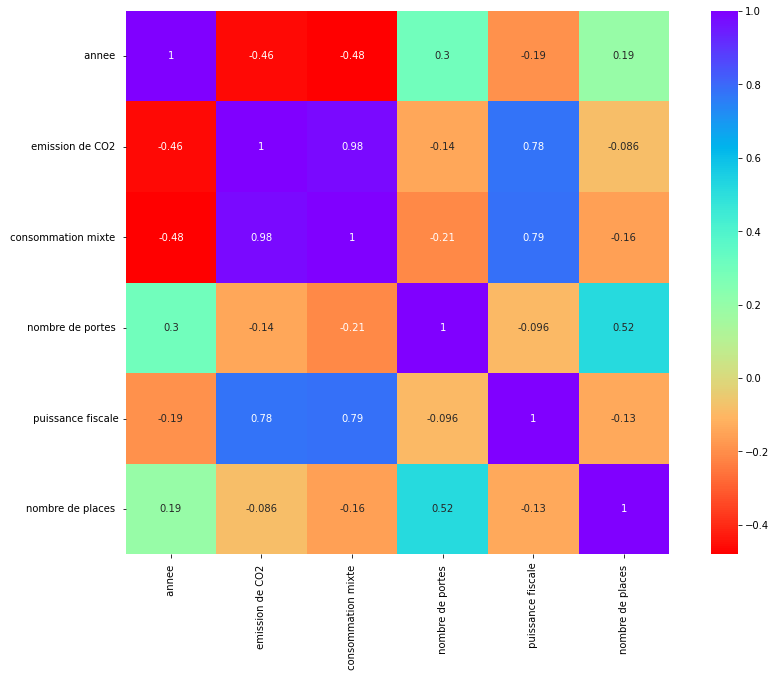

In [49]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(),annot =True,cmap='rainbow_r',square=True)
fig = sns_plot.get_figure()
fig.savefig("corrHeatmap.png")

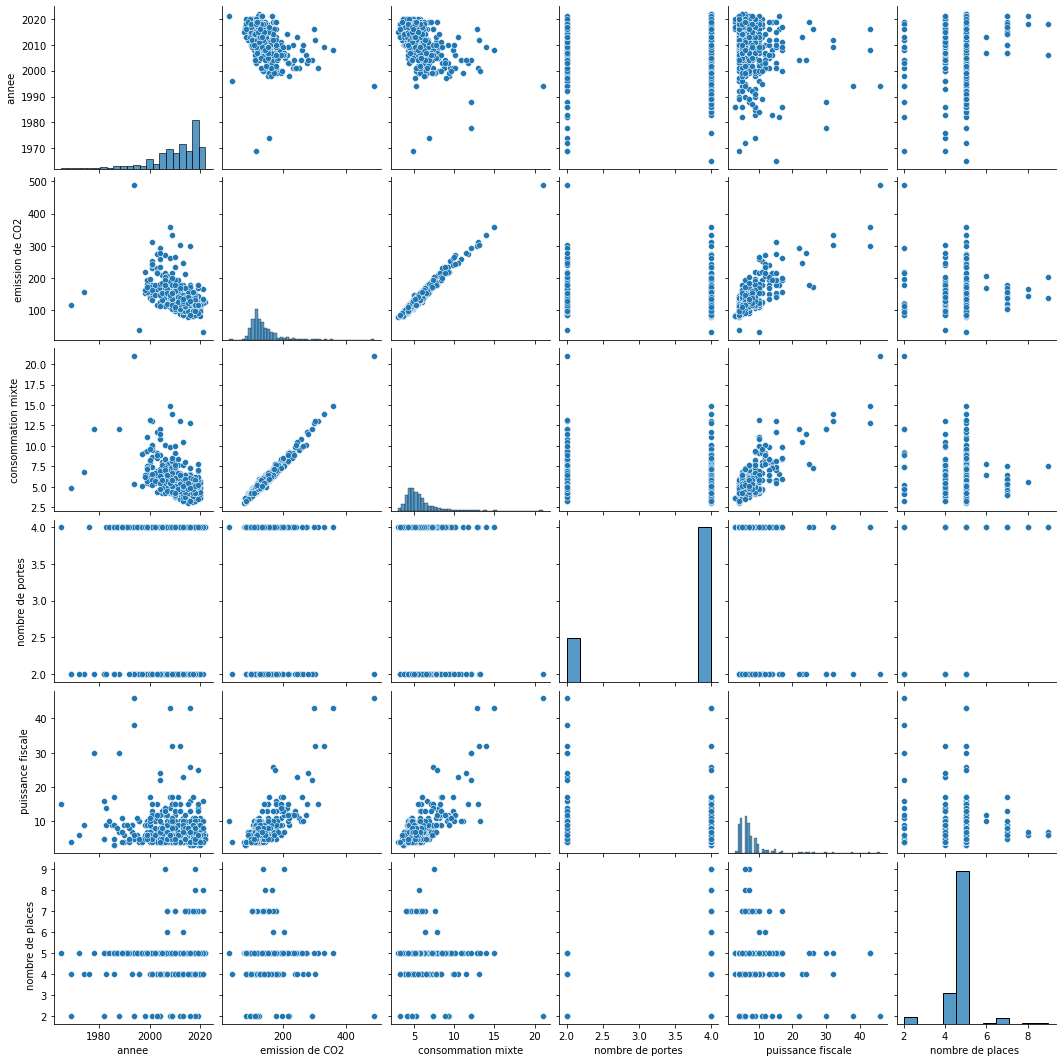

In [50]:
sns.pairplot(df)

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


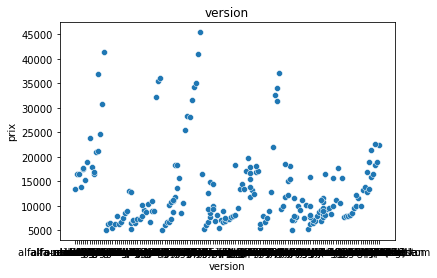

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


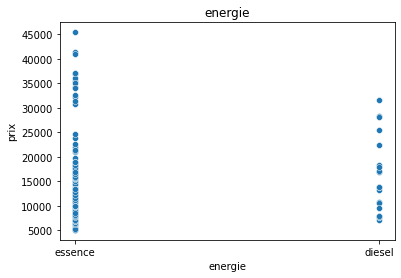

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


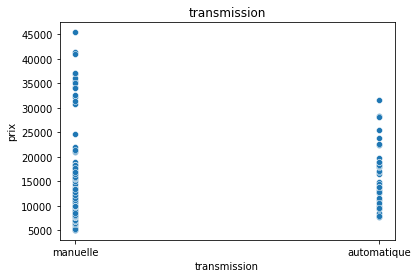

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


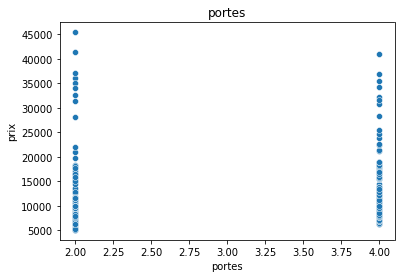

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


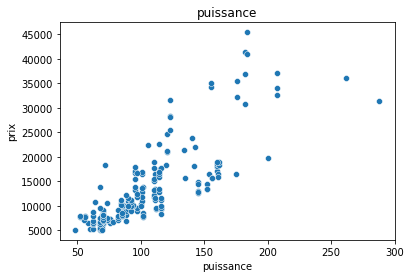

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


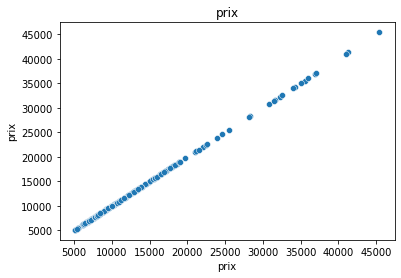

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


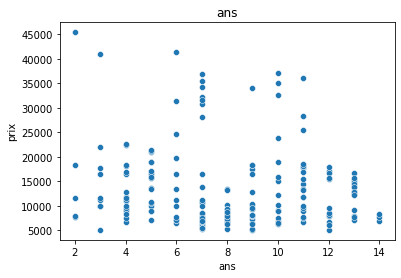

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


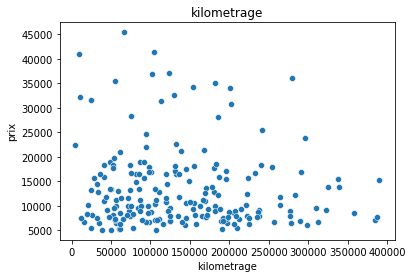

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


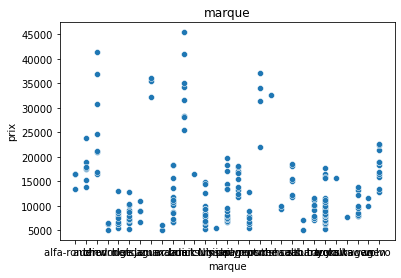

In [18]:
for i in df.keys():
    plt.title(i)
    sns.scatterplot(df[i],df['prix'])
    plt.show()

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prix', ylabel='Density'>

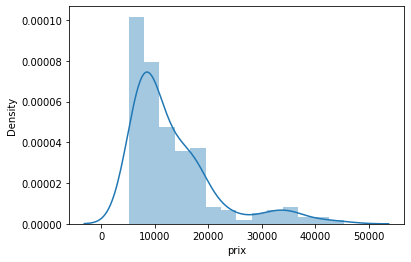

In [32]:
sns.distplot(df['prix'])

In [33]:
df.columns

Index(['version', 'energie', 'transmission', 'portes', 'puissance', 'prix',
       'ans', 'kilometrage', 'marque'],
      dtype='object')

In [36]:
from  feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(top_categories=2, variables=['energie', 'transmission'])

# fit the encoder
encoder.fit(df)


OneHotEncoder(top_categories=2, variables=['energie', 'transmission'])

In [22]:
df

,version,energie,transmission,portes,puissance,prix,ans,kilometrage,marque
0,alfa-romero giulia,1,manuelle,2,111,13495.0,8.0,49474,alfa-romero
1,alfa-romero stelvio,1,manuelle,2,111,16500.0,7.0,132109,alfa-romero
2,alfa-romero Quadrifoglio,1,manuelle,2,154,16500.0,3.0,81097,alfa-romero
3,audi 100 ls,1,manuelle,4,102,13950.0,13.0,324792,audi
4,audi 100ls,1,manuelle,4,115,17450.0,9.0,144573,audi
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),1,manuelle,4,114,16845.0,4.0,98011,volvo
201,volvo 144ea,1,automatique,4,160,19045.0,5.0,91363,volvo
202,volvo 244dl,1,manuelle,4,134,21485.0,5.0,167957,volvo
203,volvo 246,0,automatique,4,106,22470.0,4.0,4310,volvo


In [18]:
df['energie']= label_encoder.fit_transform(df['energie']) 
df['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [19]:
df1['fuelsystem']= label_encoder.fit_transform(df['fuelsystem']) 
df1['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [20]:
from word2number import w2n

In [21]:
nums = []
for i in df1['cylindernumber']:
    x = w2n.word_to_num(i)
    nums.append(x)
df1['cylindernumber'] = nums

In [22]:
df1

,symboling,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,94.5,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,99.8,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,99.4,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,109.1,2952,3,4,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,109.1,3049,3,4,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,109.1,3012,5,6,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,109.1,3217,3,6,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


##  Linear Regression

#### Self Analysis based feature

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [24]:
X = df1[['horsepower']]#.values.reshape(1,-1)
y = df1[['price']]#.values.reshape(1,-1)

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [26]:
LR = LinearRegression()

In [27]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = LR.predict(X_test)

In [29]:
r2_score(y_pred,y_test)

0.2797961850633671

In [30]:
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

Coefficient is 157.5252402805359
intercept is -3241.804243638462


Text(27.125, 0.5, 'Price')

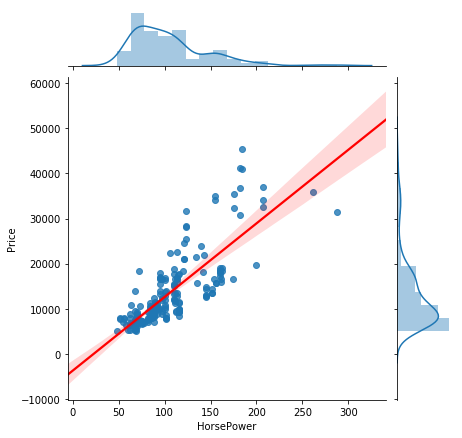

In [31]:
g = sns.jointplot(X,y,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('HorsePower')
plt.ylabel('Price')

<function matplotlib.pyplot.show(*args, **kw)>

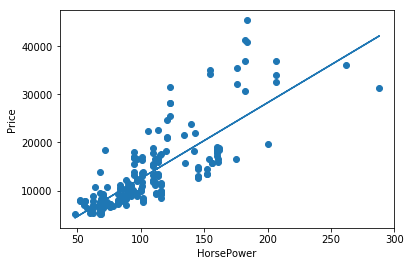

In [32]:
plt.scatter(X,y)
plt.plot(X,LR.predict(X))
plt.xlabel('HorsePower')
plt.ylabel('Price')
plt.show

In [33]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                   2.43e-104
Time:                        17:42:58   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

###### We see the Regression LIne is in Best Fit

#### RFE selected Feature

In [34]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [35]:
X = df.drop('prix',axis=1)
y = df['prix']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [36]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)

In [37]:
model = LinearRegression()

In [38]:
rfe = RFE(model, 1)

In [39]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [40]:
X_train.columns[rfe.support_]

Index(['boreratio'], dtype='object')

In [41]:
## Model Building
X = df[['boreratio']]
y = df[['price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

R2 score is 0.2797961850633671
Coefficient is 15631.18536819281
intercept is -38495.776644983736


<function matplotlib.pyplot.show(*args, **kw)>

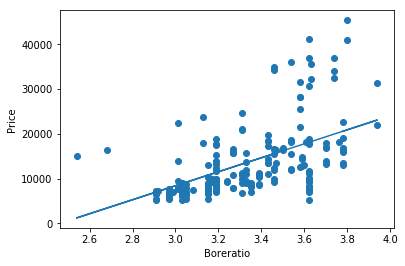

In [42]:
plt.scatter(X,y)
plt.plot(X,LR.predict(X))
plt.xlabel('Boreratio')
plt.ylabel('Price')
plt.show

Text(27.125, 0.5, 'Price')

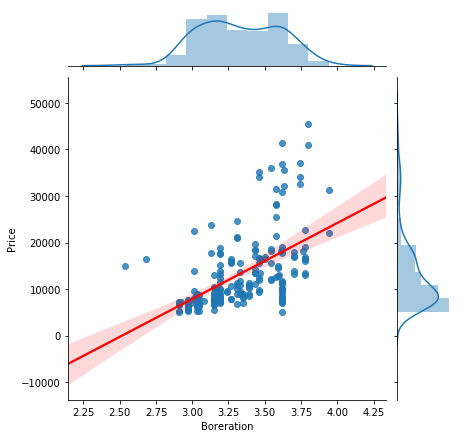

In [43]:
g = sns.jointplot(X,y,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('Boreration')
plt.ylabel('Price')

In [44]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              683.8
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                    4.56e-67
Time:                        17:42:59   Log-Likelihood:                         -2117.9
No. Observations:                 205   AIC:                                      4238.
Df Residuals:                     204   BIC:                                      4241.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Multiple Linear Regression

#### Self Analysis based Features

In [45]:
df1.columns

Index(['symboling', 'fueltype', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [46]:
X = df1.drop('price',axis=1)
y = df1['price']

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [48]:
LR.fit(X_train.values,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred = LR.predict(X_test)

In [50]:
r2_score(y_pred,y_test)

0.7893322567743295

In [51]:
print('Coefficient is',LR.coef_)
print('intercept is',LR.intercept_)

Coefficient is [ 4.22886280e+02 -9.86821498e+02  2.47993605e+02  9.93573987e-01
  3.53218813e+02 -7.34551843e+02  1.33961304e+02 -5.64405910e+01
 -1.91316250e+03 -3.44775920e+03  2.06214676e+02  3.55218797e+01
  2.31168452e+00 -2.36820085e+02  1.00864316e+02]
intercept is -25076.753719906403


In [52]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              315.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                   2.13e-125
Time:                        17:43:00   Log-Likelihood:                         -1935.1
No. Observations:                 205   AIC:                                      3900.
Df Residuals:                     190   BIC:                                      3950.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### RFE Based features

In [53]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()
model = LinearRegression()

In [55]:
## Selecting Top 7 Features
rfe = RFE(model, 7)
X_train1 = scaler.fit_transform(X_train)

In [56]:
rfe.fit(X_train1,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=7, step=1, verbose=0)

In [57]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')

In [58]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 7
Selected Features: [False False  True False False False  True False False  True  True  True
  True  True False]
Feature Ranking: [7 8 1 6 5 2 1 9 3 1 1 1 1 1 4]


In [59]:
#X = df1[{'symboling', 'fueltype', 'boreratio', 'compressionratio', 'citympg'}]
X = df1[{'wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'}]
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [60]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('intercept is',LR.intercept_)
print('Coefficient are',LR.coef_)

R2 score is 0.7893322567743295
intercept is -20658.41919510295
Coefficient are [ 2.31543530e+00  3.24266517e+02  2.37727309e+01 -2.92917424e+03
 -2.56375397e+02  1.20048878e+02  1.72227678e+02]


In [ ]:
# Sérialisation du modèle pour export
import pickle
with open('voiture_model_LR.pkl','wb') as f:
    pickle.dump(LR,f)
